## Problem Statement

#### Sales Prediction for Big Mart Outlets

* The data scientists at BigMart have collected **2013 sales data for 1559 products across 10 stores in different cities.** Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

* Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

* Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

* We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

In [2]:
## Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15,8]

In [8]:
# import the Data set
train = pd.read_csv("D:\\Python_Training\\August_batch\\SLR\\Big Market\\train_sales.csv")
test = pd.read_csv("D:\\Python_Training\\August_batch\\SLR\\Big Market\\test_sales.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
#Dimension of the data
train.shape , test.shape  # Test columns will have always n-1 columns from Train data

((8523, 12), (5681, 11))

## Exploratory Analysis
1. Univariate Analysis
2.  Bivariate Analysis

In [10]:
# info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
## Item Visibility has 0s which is incorrect
## Item_type vs Item_MRP has very high cost (products are club together)

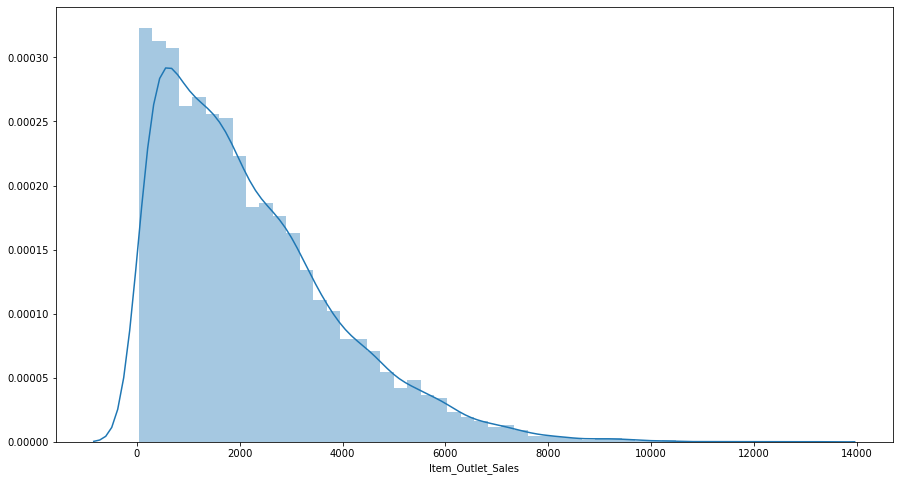

In [12]:
# Target Variable
sns.distplot(train["Item_Outlet_Sales"])
plt.show()

In [13]:
train["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

### First Submisson - Base Model
* Average

In [14]:
train["Item_Outlet_Sales"].mean()

2181.2889135750365

In [15]:
## Submission file

solution = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales":train["Item_Outlet_Sales"].mean()})

In [16]:
solution.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,2181.288914
1,FDW14,OUT017,2181.288914
2,NCN55,OUT010,2181.288914
3,FDQ58,OUT017,2181.288914
4,FDY38,OUT027,2181.288914


In [22]:
# Export it into csv
solution.to_csv("Basemodel.csv",index=False) # name of the file with ext and index = False

### Base Model RMSE: 1773.825.

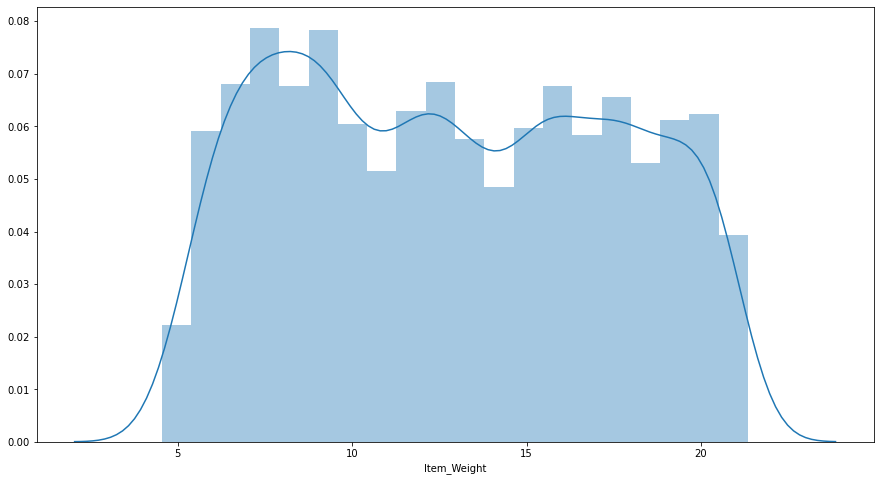

In [23]:
# Item_weight
sns.distplot(train["Item_Weight"])

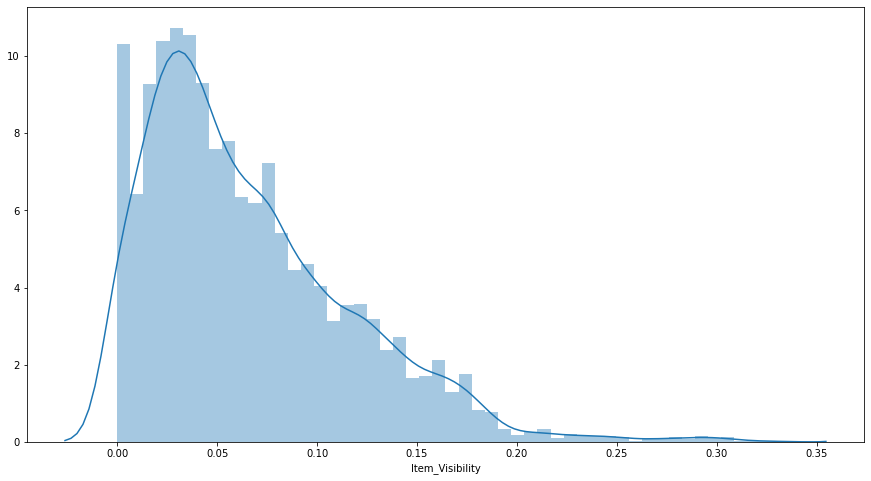

In [27]:
# Item_visibility
sns.distplot(train["Item_Visibility"])
plt.show()

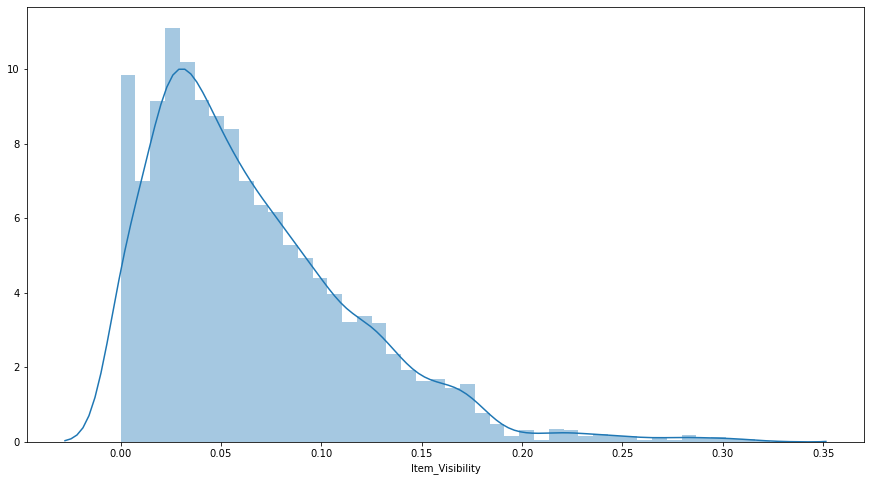

In [25]:
# Test Item_visibility
sns.distplot(test["Item_Visibility"])
plt.show()

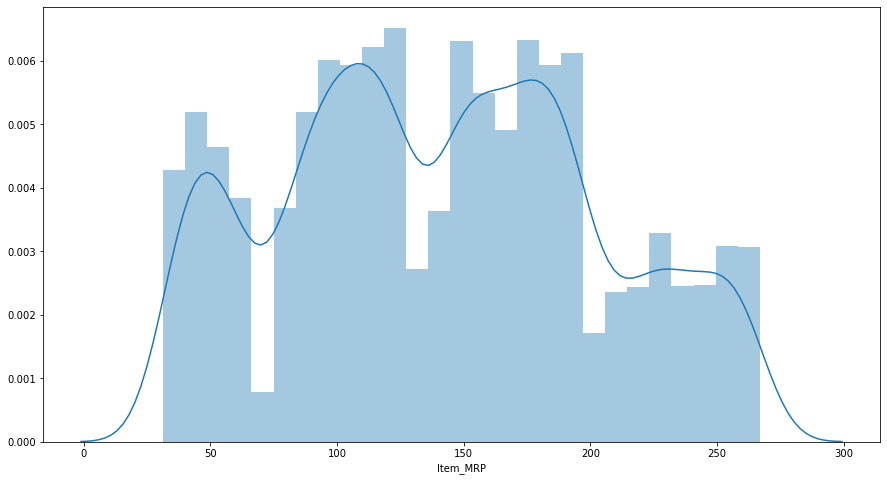

In [28]:
# Item_MRP
sns.distplot(train["Item_MRP"])
plt.show()

* Inference:-  Item_MRP has difference Data Distribution. We will use Bivariate Analysis to understand this further

In [29]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [30]:
## Single Category: sns.countplot / value_counts and then plotting the frequency
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
# Fixing the Item_Fat content
train["Item_Fat_Content"].replace(to_replace = ["reg","LF",'low fat'],value=["Regular","Low Fat","Low Fat"], inplace = True)


In [35]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

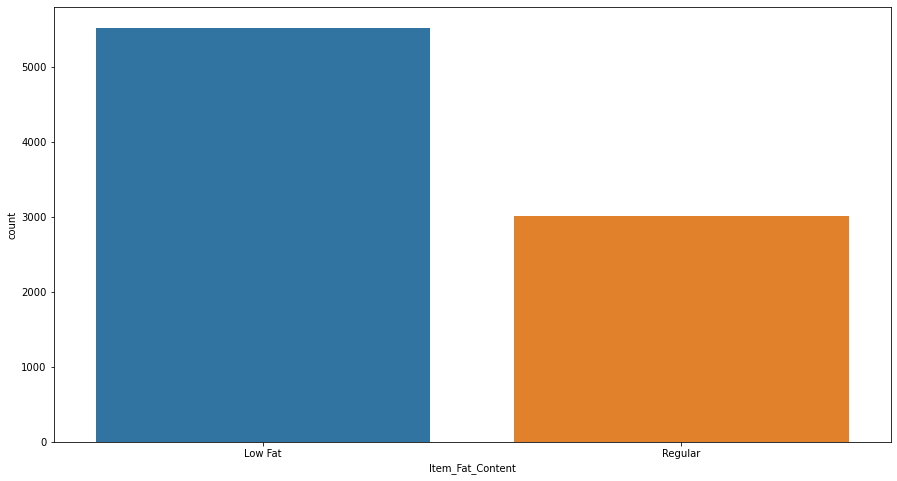

In [37]:
sns.countplot(train["Item_Fat_Content"])
plt.show()

In [39]:
## checking for test.Item_Flat_Content
test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [42]:
test["Item_Fat_Content"].replace(to_replace=["LF","low fat",'reg'],value = ["Low Fat","Low Fat","Regular"],inplace=True)
test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

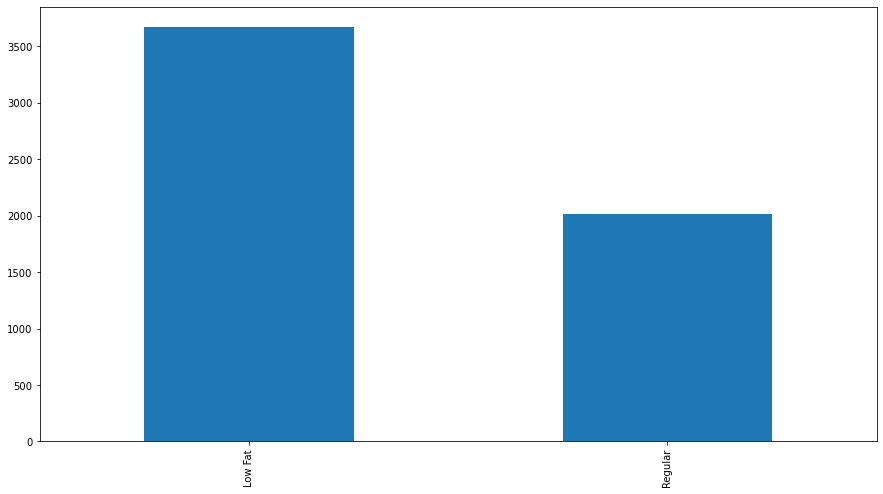

In [46]:
test['Item_Fat_Content'].value_counts().plot(kind='bar')
plt.show()

In [47]:
# Item_Type

train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

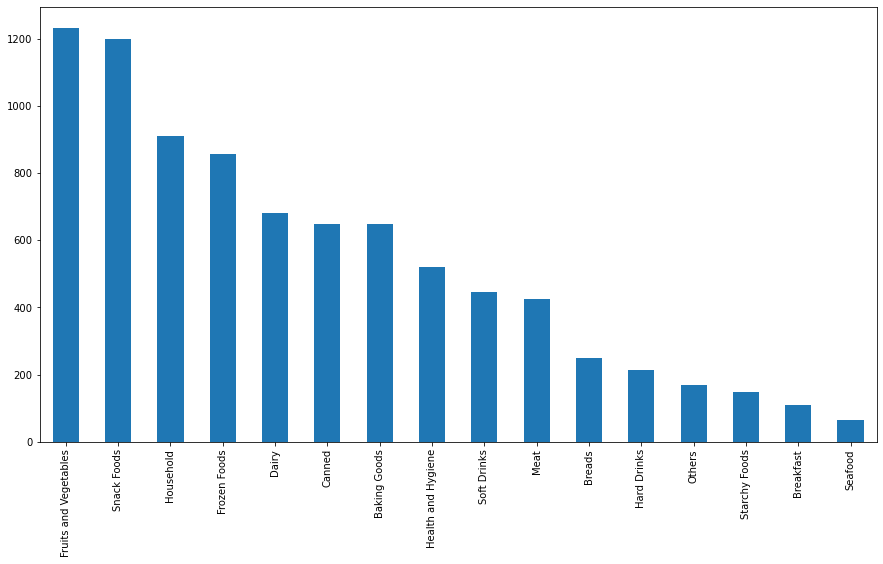

In [49]:
train["Item_Type"].value_counts().plot(kind="bar")
plt.show()

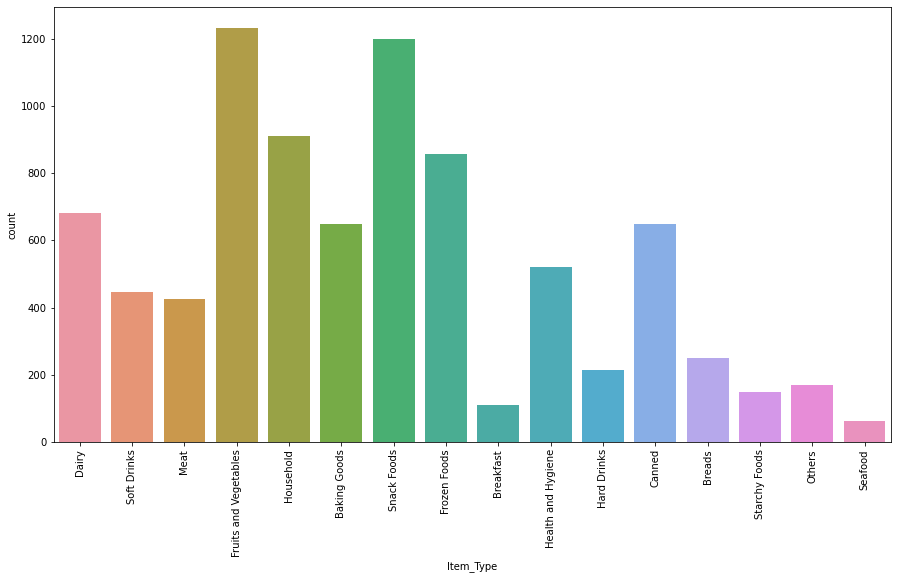

In [58]:
sns.countplot(train["Item_Type"])
plt.xticks(rotation=90)
plt.show()

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

In [59]:
# Outlet_ID
train["Outlet_Identifier"].value_counts()

## Outlet027 has the highestFrequency. Sale will also be higher for this Outlet
## Out010 & Out019 account for the lowest sale

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

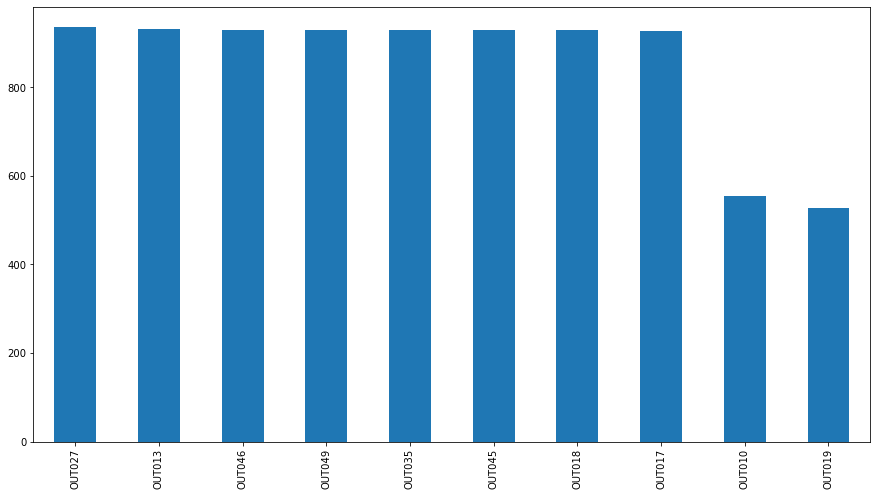

In [60]:
train["Outlet_Identifier"].value_counts().plot(kind="bar")
plt.show()

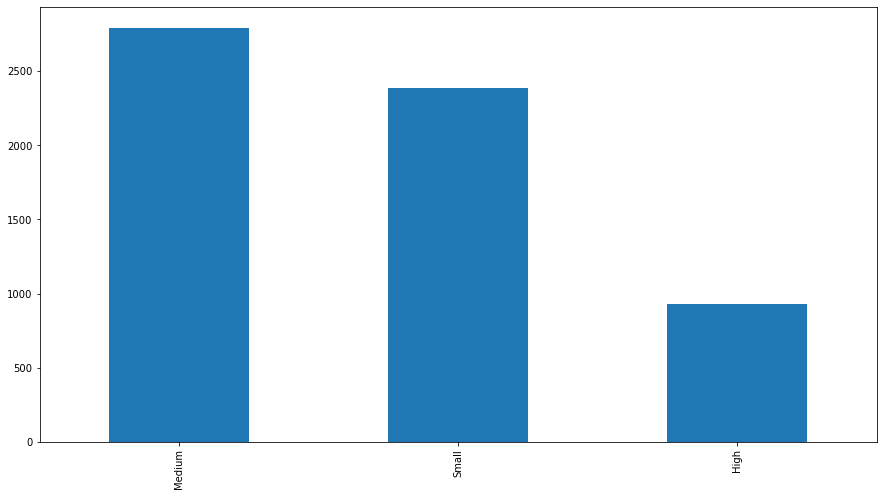

In [62]:
# Outlet_Size
train["Outlet_Size"].value_counts().plot(kind="bar")
plt.show()

In [63]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [68]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

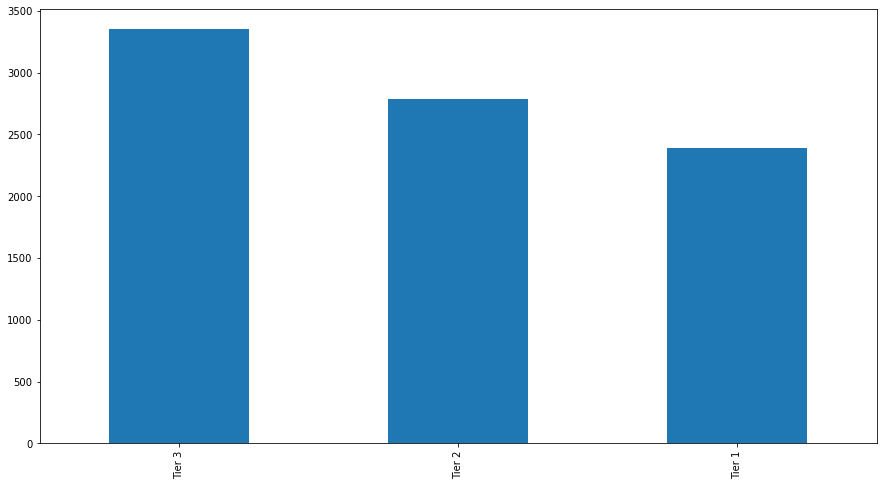

In [69]:
train["Outlet_Location_Type"].value_counts().plot(kind="bar")
plt.show()

In [65]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

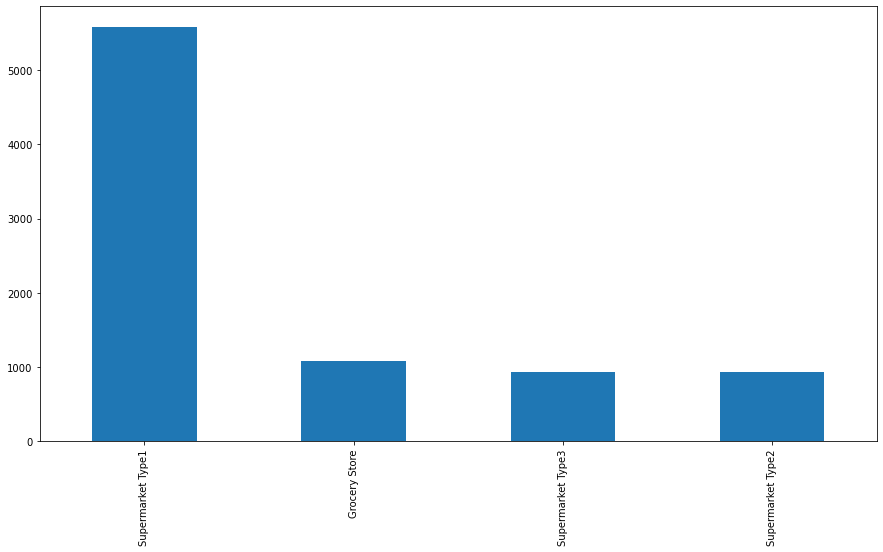

In [67]:
train["Outlet_Type"].value_counts().plot(kind="bar")
plt.show()

#### Summary of Univariate Analysis.
* Mean sale is 2181.28 dollars and the min sale is 33.29 and max sale is 13086
* Product Types - Low Fat and Regular.
* Top 3 selling item - **Fruits & Vegetables, Snack Foods and Household Items.**
* The Outlet readily availavle is **Out027**
* Most of the Outlets are **Medium** sized outlet.
* **Tier 3** location has the highest no of Outlets.
* **S1** is the most seen Outlet.

### Bivariate Analysis

* Num vs Num (Pred vs Target)
* Catg vs Num (Catg vs Target)

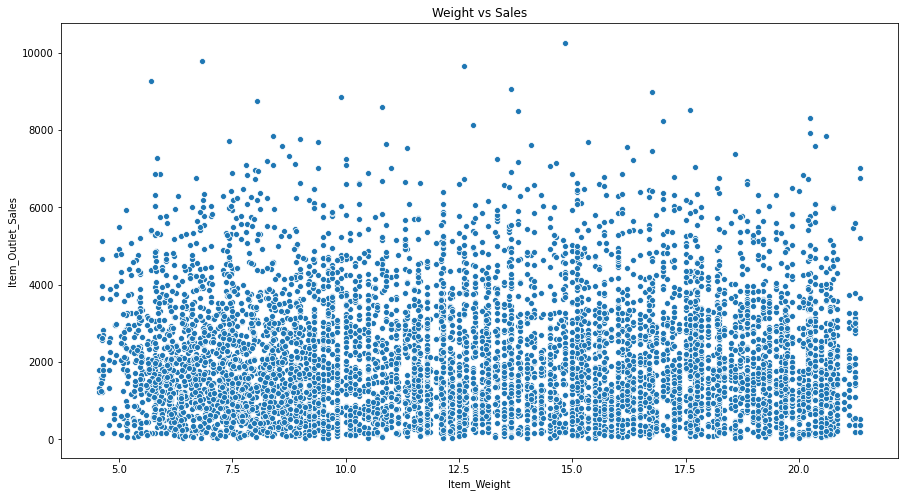

In [72]:
# Item_Weight vs Sales
sns.scatterplot(x="Item_Weight",y="Item_Outlet_Sales",data=train)
plt.title("Weight vs Sales")
plt.show()

##### Inference: There is no pattern between Weight and Sales.

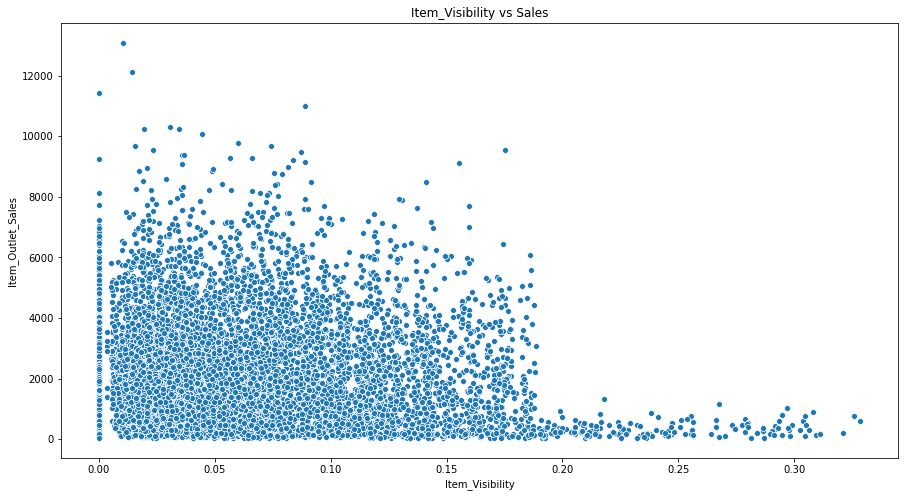

In [74]:
# Item_Visibility vs Sales
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=train)
plt.title("Item_Visibility vs Sales")
plt.show()

##### Inference: 
* Bigger the Product, lesser the Sale.
* A straight line on 0 that needs fixing.

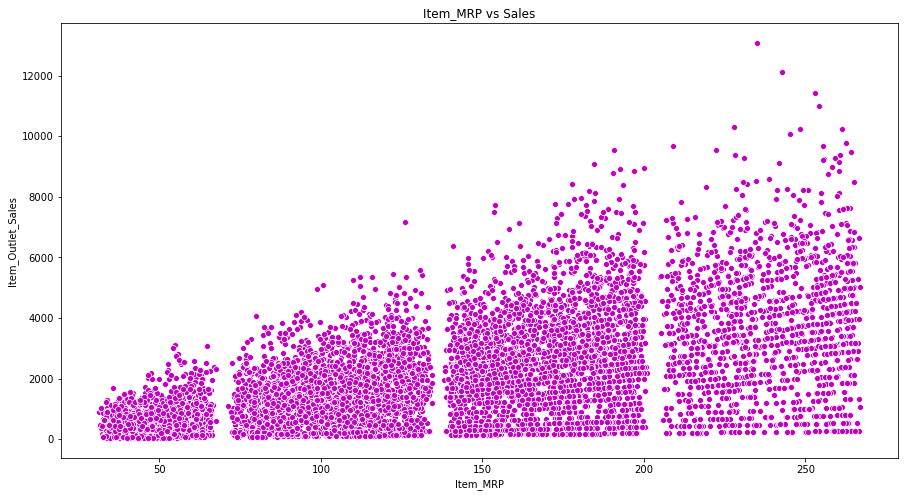

In [77]:
## Item_MRP vs Sales
sns.scatterplot(x = train["Item_MRP"],y = train["Item_Outlet_Sales"],color="m")
plt.title("Item_MRP vs Sales")
plt.show()

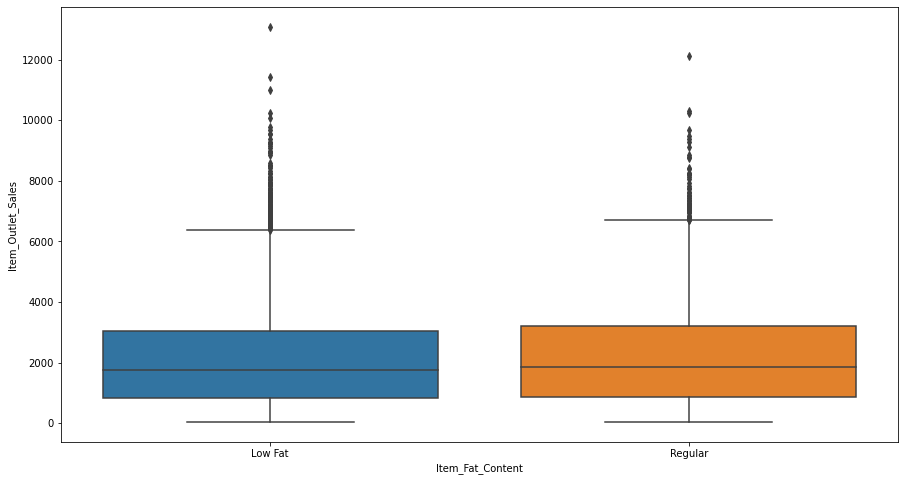

In [78]:
## Catg VS Numerical - Boxplot

# Item_Fat_Content vs Item_Outlet_Sales

sns.boxplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)
plt.show()

In [79]:
## Statistical Summary of the Boxplot above
train.groupby(by="Item_Fat_Content")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Fat_Content,,,,,,,,
Low Fat,5517.0,2157.711534,1697.973824,33.2900,826.2578,1765.0358,3050.69560,13086.9648
Regular,3006.0,2224.561170,1721.480865,33.9558,857.5504,1844.5989,3198.66965,12117.5600


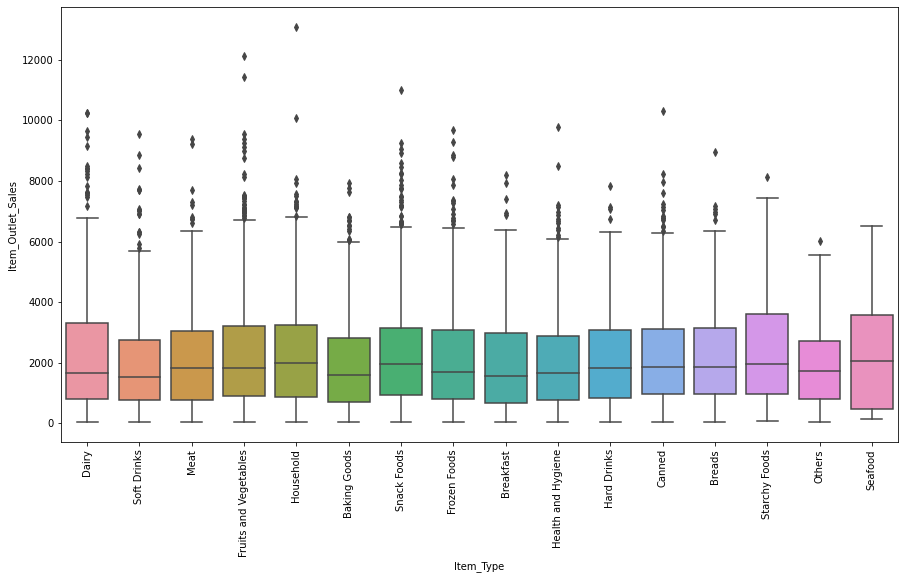

In [81]:
# Item_Type vs Item_Outlet_Sales

sns.boxplot(x="Item_Type",y="Item_Outlet_Sales",data=train)
plt.xticks(rotation = 90)
plt.show()

##### Inference: Fast Moving Products - Fruits and Vegetables, Dairy, Household, Snack Foods, Soft Drinks..

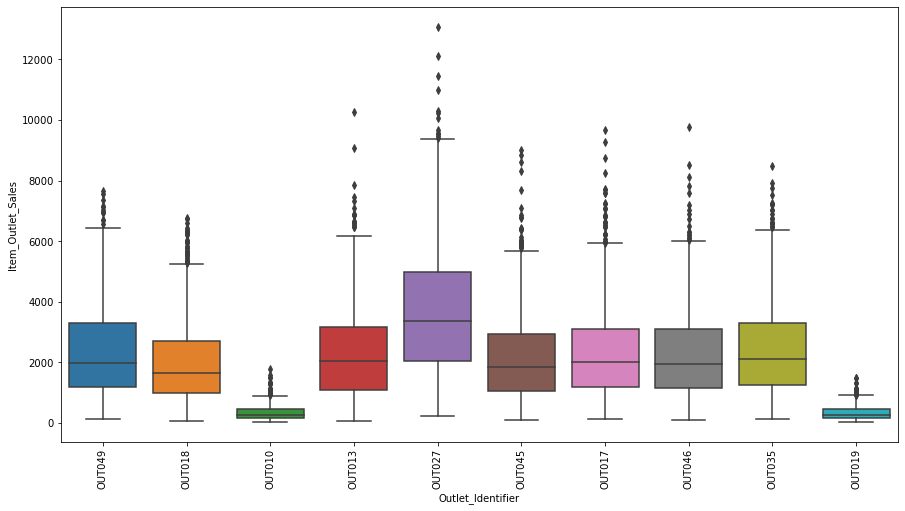

In [82]:
## Outlet_Id vs Sales
sns.boxplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=train)
plt.xticks(rotation = 90)
plt.show()

##### Inference: Out027 & Out013 accounts for High Sales and Out010 & Out019 - Lowest Sales

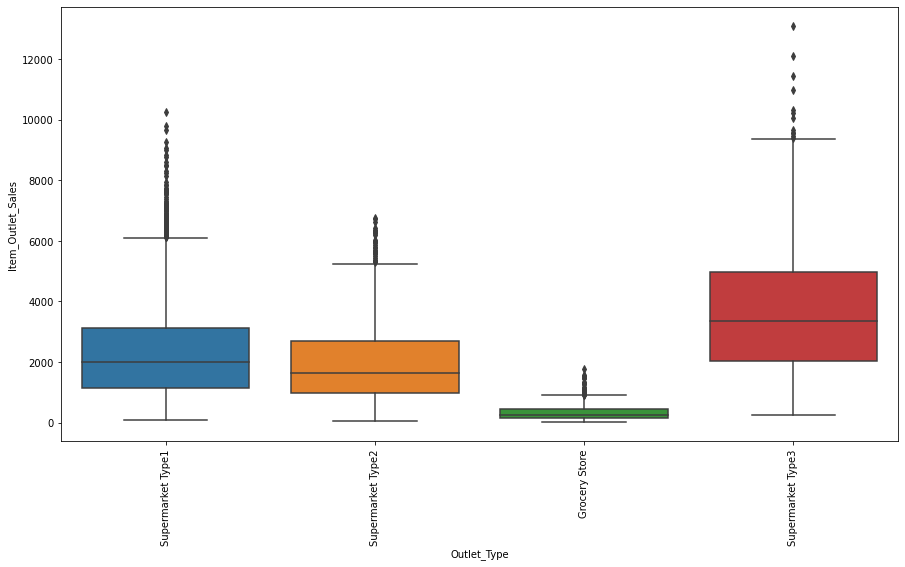

In [103]:
##  Outlet_Type vs Sales
sns.boxplot(x="Outlet_Type",y="Item_Outlet_Sales",data=train)
plt.xticks(rotation = 90)
plt.show()

##### Inference: S3 & S2 accounts for High Sales.

#### Summary of Bivariate Analysis
* Low Fat Item sell more than Regular.
* No pattern was found between Weight and Target.
* We saw interesting pattern visibility & TGT 
* We also saw that there is a straight line at 0 in visibility plot which needs fixing. 
* OUT027 & Out013 earns the biggest revenue generator label & Out10 and Out 19 are the slow movers 
* S1 and S3 makes lot of money for the business. 
* Fast Moving Products are Fruits & Veggies, Snacks, Soft Drinks, Households...

##### Missing Values

In [84]:
train.isnull().sum()

## Item_Weight & Outlet_Size same columns for both train and test

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [85]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [304]:
## Combined train and test
combined = pd.concat((train,test),ignore_index=True)

In [163]:
combined.shape

(14204, 12)

In [164]:
combined.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [165]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [166]:
combined.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [167]:
combined["Item_Identifier"].value_counts()

DRN37    10
FDR33    10
FDS59    10
NCI06    10
FDX03    10
         ..
FDM10     7
FDM50     7
FDR51     7
FDH58     7
FDM52     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [146]:
combined[combined["Item_Identifier"] == "FDA15"]["Item_Weight"]

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    NaN
7543    9.3
9638    9.3
Name: Item_Weight, dtype: float64

In [147]:
combined.groupby(by="Item_Identifier")["Item_Weight"].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [407]:
# using Lambda to fill null values in Item Weight
combined["Item_Weight"] = combined.groupby(by="Item_Identifier")["Item_Weight"].apply(lambda x : x.fillna(x.mean()))

In [408]:
combined.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Type_Catg                  0
Item_Vintage                    0
Outlets                         0
ItemId_Cat                      0
dtype: int64

In [178]:
combined.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [179]:
combined[combined["Item_Identifier"] == 'FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.0,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464
11896,FDP10,19.0,Low Fat,0.128612,Snack Foods,104.1622,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
12371,FDP10,19.0,Low Fat,0.214397,Snack Foods,105.8622,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
13327,FDP10,19.0,Low Fat,0.224269,Snack Foods,104.4622,OUT019,1985,Small,Tier 1,Grocery Store,NaN


In [180]:
combined["Outlet_Size"].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [182]:
combined.groupby("Outlet_Type")["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [188]:
combined.groupby(["Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [204]:
combined.loc[combined["Outlet_Size"].isna()]["Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [201]:
combined.loc[combined["Outlet_Size"].isna()]["Outlet_Location_Type"].unique()

# Grocery Store and S1

array(['Tier 3', 'Tier 2'], dtype=object)

In [207]:
## Fill with small
combined.loc[combined["Outlet_Size"].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14191,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN
14193,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14201,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [299]:
combined[combined["Outlet_Type"] == "Grocery Store"]["Outlet_Size"] = "Small"

In [316]:
combined.loc[(combined["Outlet_Type"] == "Supermarket Type1") & (combined["Outlet_Location_Type"] == "Tier 2"),["Outlet_Size"]] = "Small"

In [313]:
combined.loc[combined["Outlet_Type"]=="Grocery Store","Outlet_Size"] = "Small"

In [314]:
combined[combined["Outlet_Type"]=="Grocery Store"]["Outlet_Size"]

3        Small
23       Small
28       Small
29       Small
30       Small
         ...  
14119    Small
14123    Small
14166    Small
14173    Small
14191    Small
Name: Outlet_Size, Length: 1805, dtype: object

In [317]:
combined.loc[(combined["Outlet_Type"] == "Supermarket Type1") & (combined["Outlet_Location_Type"] == "Tier 2"),["Outlet_Size"]]

,Outlet_Size
8,Small
9,Small
19,Small
22,Small
25,Small
...,...
14185,Small
14193,Small
14201,Small
14202,Small


In [297]:
# combined[(combined["Outlet_Type"] == "Supermarket Type1") & (combined["Outlet_Location_Type"] == "Tier 2")][["Outlet_Size"]]

pandas.core.frame.DataFrame

In [318]:
combined["Outlet_Size"].isna().sum()

0

### Feature Engineering

In [319]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [320]:
# Deal with 0's in Visibility
combined["Item_Visibility"].describe()

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [324]:
# Lambda combined["Item_Weight"]
combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x : x.replace(0,x.mean()))

0        0.016047
1        0.019278
2        0.016760
3        0.017834
4        0.009780
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.088380
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [328]:
combined["Item_Visibility"] = combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x : x.replace(0,x.mean()))

In [331]:
combined["Item_Visibility"].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

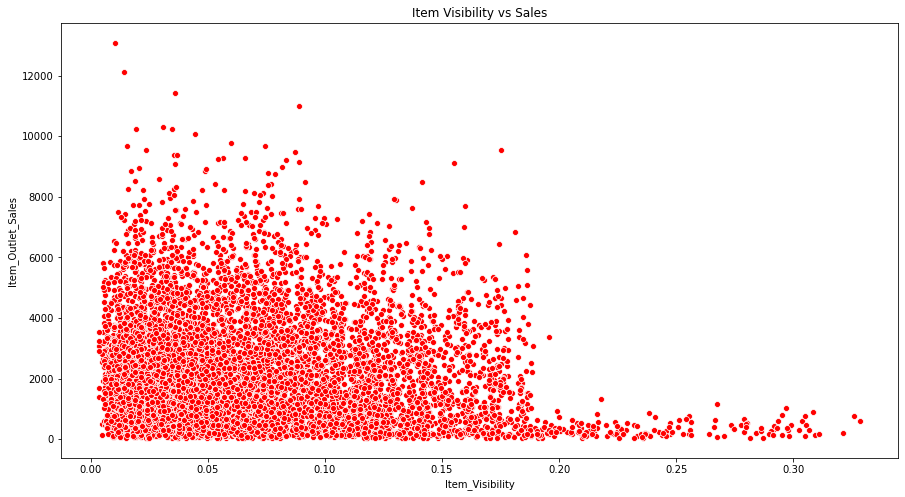

In [330]:
# Item_Visibility VS Sales 
sns.scatterplot(combined["Item_Visibility"],combined["Item_Outlet_Sales"], color = "r")
plt.title("Item Visibility vs Sales")
plt.show()

In [333]:
## Item Type
combined["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [334]:
perishables = ["Dairy","Meat","Fruits and Vegetables",
              "Breakfast","Canned","Breads","Starchy Foods","Seafood"]

## Function to convert it

def perish(x):
    if x in (perishables):
        return ("Perishables")
    else:
        return("Non Perishable")
    

In [335]:
## Apply on Item_Type

combined["Item_Type_Catg"] = combined["Item_Type"].apply(perish)

In [339]:
# Outlet Vintage
combined["Item_Vintage"] = 2013 - combined["Outlet_Establishment_Year"]

In [341]:
## Outlet_Id
combined["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [342]:
def outlets(x):
    if(x == "OUT027"):
        return ("OUT027")
    else:
        return "Others"
    
combined["Outlets"] = combined["Outlet_Identifier"].apply(outlets)

In [343]:
combined.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishable,4,Others
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non Perishable,26,Others


In [346]:
## Item Identifier
combined.iloc[0][0][:2]

'FD'

In [349]:
# Pattern from Item_ID

mylist = []
for i in combined["Item_Identifier"]:
    mylist.append(i[0:2])
    
combined["ItemId_Cat"] = pd.Series(mylist)

In [355]:
combined.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishable,4,Others,DR


In [409]:
## Dropping the variables

df = combined.drop(["Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year"],axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishable,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Low Fat,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non Perishable,26,Others,NC


In [410]:
df.loc[df["ItemId_Cat"] == "NC", "Item_Fat_Content"]

4        Low Fat
16       Low Fat
22       Low Fat
25       Low Fat
31       Low Fat
          ...   
14162    Low Fat
14164    Low Fat
14165    Low Fat
14195    Low Fat
14201    Low Fat
Name: Item_Fat_Content, Length: 2686, dtype: object

In [411]:
## Chnaging the Item Fat Content as per the Item Id
df.loc[df['ItemId_Cat']=='NC',"Item_Fat_Content"] = "Non Edible"

In [412]:
df.loc[df["ItemId_Cat"] == 'NC',"Item_Fat_Content"]

4        Non Edible
16       Non Edible
22       Non Edible
25       Non Edible
31       Non Edible
            ...    
14162    Non Edible
14164    Non Edible
14165    Non Edible
14195    Non Edible
14201    Non Edible
Name: Item_Fat_Content, Length: 2686, dtype: object

In [413]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishable,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Non Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non Perishable,26,Others,NC


In [414]:
## Split the Data in Train and Test
train.shape

(8523, 12)

In [415]:
newtrain = df.iloc[:8523]

In [416]:
newtest = df.iloc[8523:]

In [417]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Perishables,14,Others,FD
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Non Perishable,4,Others,DR
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Perishables,14,Others,FD
3,19.20,Regular,0.017834,182.0950,Small,Tier 3,Grocery Store,732.3800,Perishables,15,Others,FD
4,8.93,Non Edible,0.009780,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non Perishable,26,Others,NC


In [418]:
# Reset_index
newtest.reset_index(drop = True,inplace=True)
newtest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,NaN,Non Perishable,14,Others,FD
1,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,NaN,Perishables,6,Others,FD
2,14.600,Non Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,NaN,Non Perishable,15,Others,NC
3,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,NaN,Non Perishable,6,Others,FD
4,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,NaN,Perishables,28,OUT027,FD


In [419]:
newtest.drop("Item_Outlet_Sales",axis=1,inplace=True)
newtest.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Catg,Item_Vintage,Outlets,ItemId_Cat
0,20.750,Low Fat,0.007565,107.8622,Medium,Tier 1,Supermarket Type1,Non Perishable,14,Others,FD
1,8.300,Regular,0.038428,87.3198,Small,Tier 2,Supermarket Type1,Perishables,6,Others,FD
2,14.600,Non Edible,0.099575,241.7538,Small,Tier 3,Grocery Store,Non Perishable,15,Others,NC
3,7.315,Low Fat,0.015388,155.0340,Small,Tier 2,Supermarket Type1,Non Perishable,6,Others,FD
4,13.600,Regular,0.118599,234.2300,Medium,Tier 3,Supermarket Type3,Perishables,28,OUT027,FD


In [420]:
newtrain.shape, newtest.shape

((8523, 12), (5681, 11))

### Model building

In [421]:
## dummies
dummytrain = pd.get_dummies(newtrain,drop_first = True)
dummytest = pd.get_dummies(newtest, drop_first = True)

In [422]:
dummytrain.shape, dummytest.shape

((8523, 18), (5681, 17))

In [393]:
## If we have not done Feature engg and Generalization we would have got so many cols
pd.get_dummies(train,drop_first=True).shape

(8523, 1595)

In [474]:
## Validation Set comes from train set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
ridge = Ridge(alpha=0.5, normalize = True)
lasso = Lasso(alpha=0.5, normalize = True)

# Define x and y
X = dummytrain.drop("Item_Outlet_Sales",axis=1)
y = dummytrain["Item_Outlet_Sales"]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state=42,test_size=0.2)

# Def a Function that will return RMSE
def rmse(y_test, pred):
    RMSE = np.sqrt(mean_squared_error(y_test, pred))
    print("RMSE:",np.round(RMSE,4))
    
pred_lr = lr.fit(xtrain, ytrain).predict(xtest)
rmse(ytest,pred_lr)

RMSE: 1067.847


In [477]:
## Building a Final Model
lrreg = LinearRegression()
pred_reg = lrreg.fit(X, y).predict(dummytest)

## Submission DataFrame

solution = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales": pred_reg})

# Export the Df
solution.to_csv("LRModel.csv",index=False)

In [478]:
solution["Item_Outlet_Sales"].describe()

count    5681.000000
mean     2182.070988
std      1276.599547
min     -1364.244639
25%      1330.850339
50%      2150.423059
75%      3059.359250
max      5671.864663
Name: Item_Outlet_Sales, dtype: float64

In [430]:
## Building the Model with Bagging
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()

pred = bagg.fit(X, y).predict(dummytest)

In [433]:
## Submission DataFrame

solution = pd.DataFrame({"Item_Identifier":test["Item_Identifier"],
                        "Outlet_Identifier":test["Outlet_Identifier"],
                        "Item_Outlet_Sales": pred})

# Export the Df
solution.to_csv("Bagging Model.csv",index=False)

In [434]:
solution["Item_Outlet_Sales"].describe()

count    5681.000000
mean     2215.561131
std      1455.043273
min        51.399760
25%      1042.443060
50%      2031.355800
75%      3122.002780
max      8567.181500
Name: Item_Outlet_Sales, dtype: float64

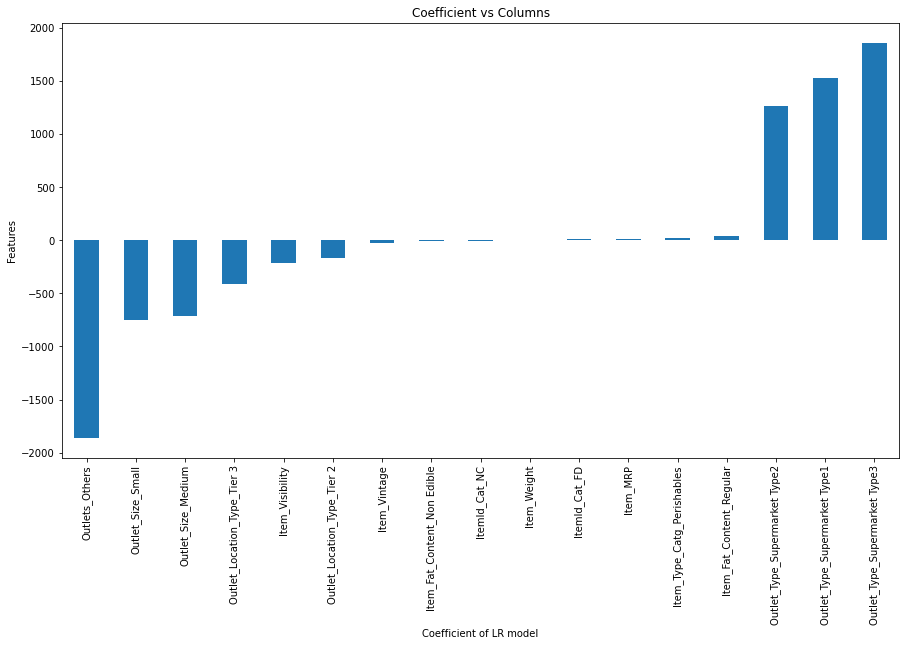

In [440]:
## Regression Coefficients
pd.Series(lr.coef_,X.columns).sort_values().plot(kind="bar")
plt.xlabel("Coefficient of LR model")
plt.ylabel("Features")
plt.title("Coefficient vs Columns")
plt.show()

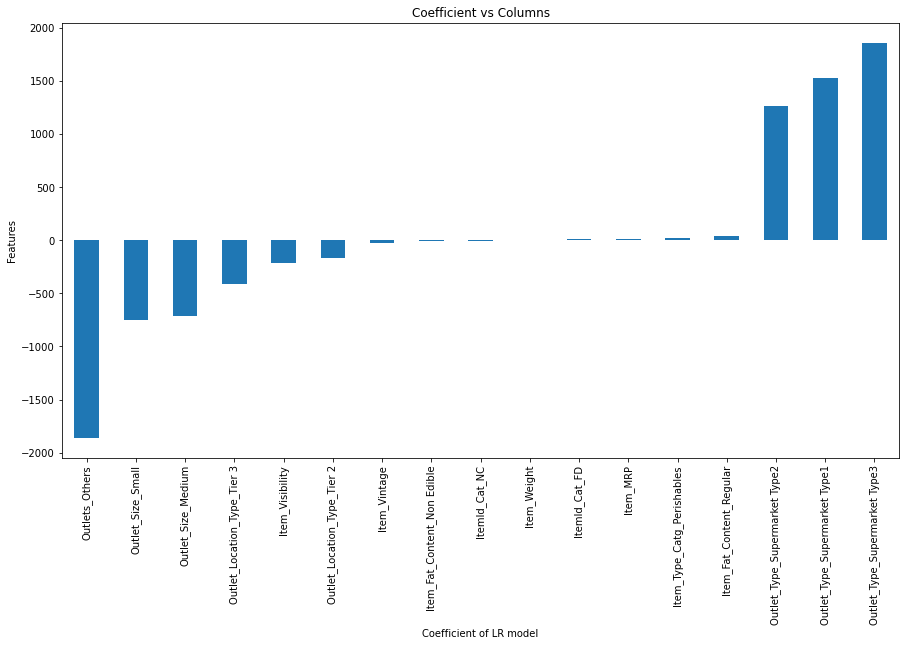

In [479]:
## Regression Coefficients
pd.Series(lr.coef_,X.columns).sort_values().plot(kind="bar")
plt.xlabel("Coefficient of LR model")
plt.ylabel("Features")
plt.title("Coefficient vs Columns")
plt.show()

### About Regularization
* Some Predictors get high weightage in comparison to others. Hence, the model is overfitting when it comes to these features. It is not the correct thing because the model is not giving due importance to the other features and hence we need to introduce **Regularization.**

* Regularization will introduce a parameter called **alpha.** This is also called as **Shrinkage Parameter.** It will shrink the Parameters which have very high value and will normalize it.

* There are **2 Regularization Techniques which are L1 and L2 Regularization** and are popularly known as **Lasso and Ridge Regression**

### Lasso Regression

In [481]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

# Predictor and Target
X = dummytrain.drop("Item_Outlet_Sales",axis=1)
y = dummytrain["Item_Outlet_Sales"]

# Simple Model to see the effect on Train RMSE vs Test RMSE
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,test_size=0.20)

lasso = Lasso(alpha = 1.0,normalize = True)
pred_train = lasso.fit(xtrain,ytrain).predict(xtrain)
pred_test = lasso.fit(xtrain,ytrain).predict(xtest)

print("Train RMSE:",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("Test RMSE:",np.sqrt(mean_squared_error(ytest,pred_test)))

Train RMSE: 1183.197918585164
Test RMSE: 1107.155702055104


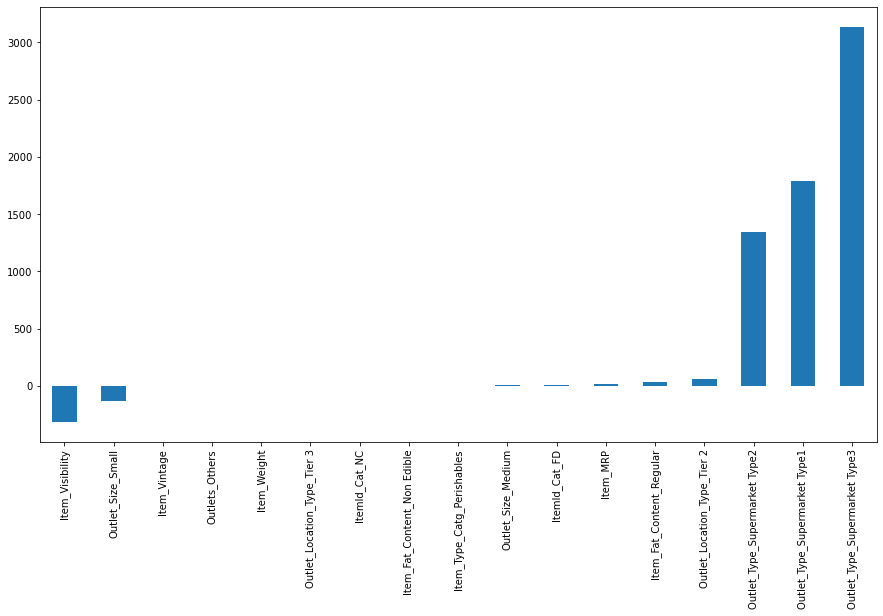

In [455]:
## Plot the Coefficients.
pd.Series(lasso.coef_, xtrain.columns).sort_values().plot(kind='bar')
plt.show()

##### As we decreases alpha value, Coefficients are not restricted and most of the var are still 0

In [482]:
# Function that tells which predictors are 0s basis alpha values

def lassos(alphas):
    # Create a DataFrame
    df = pd.DataFrame()
    
    #Names of the Column/Predictors
    df["Features"] = xtrain.columns
    
    # loop for all alphas 
    for i in alphas:
        lasso = Lasso(alpha=i)
        lasso.fit(xtrain,ytrain)
        col_name = "Alpha = %f" % i
        df[col_name] = lasso.coef_
    return(df)

In [483]:
lassos([0.3, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10])

,Features,Alpha = 0.300000,Alpha = 0.010000,Alpha = 0.001000,Alpha = 0.500000,Alpha = 0.990000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000
0,Item_Weight,-1.328722,-1.427497,-1.430917,-1.261328,-1.154275,-1.153996,-1.125719,-1.048027e+00,-9.296984e-01
1,Item_Visibility,-220.866064,-335.016667,-338.561885,-141.839594,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00
2,Item_MRP,15.642995,15.642732,15.642737,15.643023,15.645623,15.645637,15.647197,1.565152e+01,1.565367e+01
3,Item_Vintage,-11.824240,-21.347692,-21.757382,-6.394533,-4.287687,-4.305787,-6.243638,-1.168723e+01,-2.048076e+01
4,Item_Fat_Content_Non Edible,1.538904,0.140923,-38.427074,3.133009,0.000000,0.000000,0.000000,-0.000000e+00,-0.000000e+00
5,Item_Fat_Content_Regular,43.589966,44.636875,44.665377,42.785395,40.687214,40.655901,37.544291,2.821808e+01,6.341811e+00
6,Outlet_Size_Medium,-254.778145,-533.778824,-545.434976,-87.332497,-0.000000,-0.000000,0.000000,0.000000e+00,0.000000e+00
7,Outlet_Size_Small,-368.429564,-615.633166,-625.969242,-216.367508,-143.569046,-143.715926,-162.457908,-2.268314e+02,-3.375047e+02
8,Outlet_Location_Type_Tier 2,0.000000,-75.062064,-78.345746,37.330749,55.883419,55.814620,48.071417,2.685739e+01,0.000000e+00
9,Outlet_Location_Type_Tier 3,-155.565933,-308.203317,-314.527475,-62.502920,-7.175493,-7.025364,-0.000000,-0.000000e+00,0.000000e+00


In [484]:
lassos([1, 2, 5, 10, 20, 25, 50])

# As you increase more alpha values, coefficient values eventually become 0.
# As you introduce more bias, the model simplfies but it will loose the prediction power.

,Features,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000,Alpha = 20.000000,Alpha = 25.000000,Alpha = 50.000000
0,Item_Weight,-1.153996,-1.125719,-1.048027e+00,-9.296984e-01,-5.803259e-01,-3.661168e-01,-0.000000e+00
1,Item_Visibility,-0.000000,-0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
2,Item_MRP,15.645637,15.647197,1.565152e+01,1.565367e+01,1.565564e+01,1.565030e+01,1.562483e+01
3,Item_Vintage,-4.305787,-6.243638,-1.168723e+01,-2.048076e+01,-3.122017e+01,-2.945075e+01,-2.059814e+01
4,Item_Fat_Content_Non Edible,0.000000,0.000000,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
5,Item_Fat_Content_Regular,40.655901,37.544291,2.821808e+01,6.341811e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,Outlet_Size_Medium,-0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
7,Outlet_Size_Small,-143.715926,-162.457908,-2.268314e+02,-3.375047e+02,-5.081991e+02,-4.900368e+02,-3.993268e+02
8,Outlet_Location_Type_Tier 2,55.814620,48.071417,2.685739e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
9,Outlet_Location_Type_Tier 3,-7.025364,-0.000000,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [505]:
# Finding the RMSE and R2 Behavious basis different alphas.
from sklearn.metrics import r2_score, mean_squared_error
rmse_train = []
rmse_test = []
al = []
r2 = []

# alphas = [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]
alphas = [0.1, 0.01, 0.001, 0.5, 0.99, 1, 2, 5, 10, 20, 30, 50]

for i in alphas:
    lasso = Lasso(alpha = i,normalize = True)
    al.append(i)
    pred_tr  = lasso.fit(xtrain,ytrain).predict(xtrain)
    pred_te = lasso.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_te)))
    r2.append(r2_score(ytest,pred_te))

In [506]:
lasso_df = pd.DataFrame({"Alpha":al,"Rsq":r2,"Train_rmse":rmse_train,"Test_rmse":rmse_test}).sort_values(by="Rsq",ascending=False)

In [507]:
lasso_df.sort_values(by="Rsq",ascending=False)

,Alpha,Rsq,Train_rmse,Test_rmse
2,0.001,0.580377,1142.894776,1067.953180
1,0.010,0.579801,1143.095372,1068.684790
0,0.100,0.579657,1143.657788,1068.868418
3,0.500,0.572840,1153.569396,1077.500939
4,0.990,0.549651,1182.421188,1106.361290
5,1.000,0.549004,1183.197919,1107.155702
6,2.000,0.490516,1251.536494,1176.758885
7,5.000,0.311961,1438.159537,1367.504685
8,10.000,0.089069,1641.509922,1573.493958
9,20.000,-0.004084,1719.898321,1651.989750


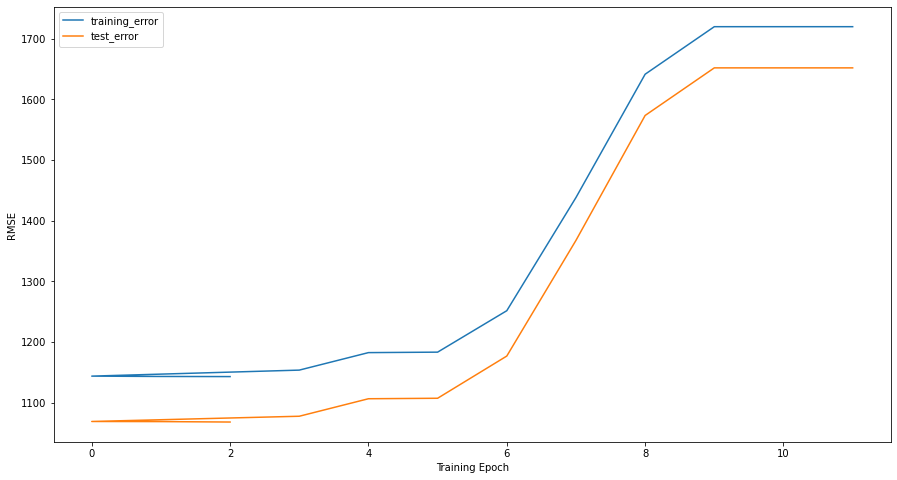

In [509]:
plt.plot(lasso_df["Train_rmse"],label="training_error")
plt.plot(lasso_df["Test_rmse"],label="test_error")
plt.xlabel("Training Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

* Inf: As we introduce higher values of alpha, model complexity reduces.
* At the same time, the R2 Score reduces and Error increases. This is the point where prediction power gets compromised.

In [510]:
# If test error is higher than training error
# you need to increase the test %age
# Apply CV to find the same...

# max_iter - How many items the model will run...
lassocv = LassoCV(cv = 5,normalize = True,max_iter = 10000)

pred_tr = lassocv.fit(xtrain, ytrain).predict(xtrain)
pred_te = lassocv.fit(xtrain, ytrain).predict(xtest)

print("train error:",np.sqrt(mean_squared_error(ytrain,pred_tr)))
print("test error:",np.sqrt(mean_squared_error(ytest,pred_te)))

train error: 1143.5174749497635
test error: 1068.7812287210395


In [511]:
lassocv.alpha_

0.08306921850519113

In [522]:
# alpha = 0.001  --> Real time Problem
lasso = Lasso(alpha = 0.001, normalize = True)
lasso.fit(X,y).predict(dummytest)

array([1835.44379897, 1611.68857424, 1878.26688767, ..., 1871.90764176,
       3581.19331386, 1339.78815022])

* Seen the effect of different alpha values with Coefficients
* Saw the effect of Different alpha values with R2 Score and RMSE
* Applied LassoCV to find the same Alpha Value...

### Ridge Regression

In [525]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error

xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=42,test_size=0.20)

ridge = Ridge(alpha=0.1, normalize = True)

pred_train = ridge.fit(xtrain, ytrain).predict(xtrain)
pred_test = ridge.fit(xtrain, ytrain).predict(xtest)

print("Train_RMSE:",np.sqrt(mean_squared_error(ytrain,pred_train)))
print("Test_RMSE:",np.sqrt(mean_squared_error(ytest,pred_test)))

Train_RMSE: 1158.9888273647202
Test_RMSE: 1084.4337533672378


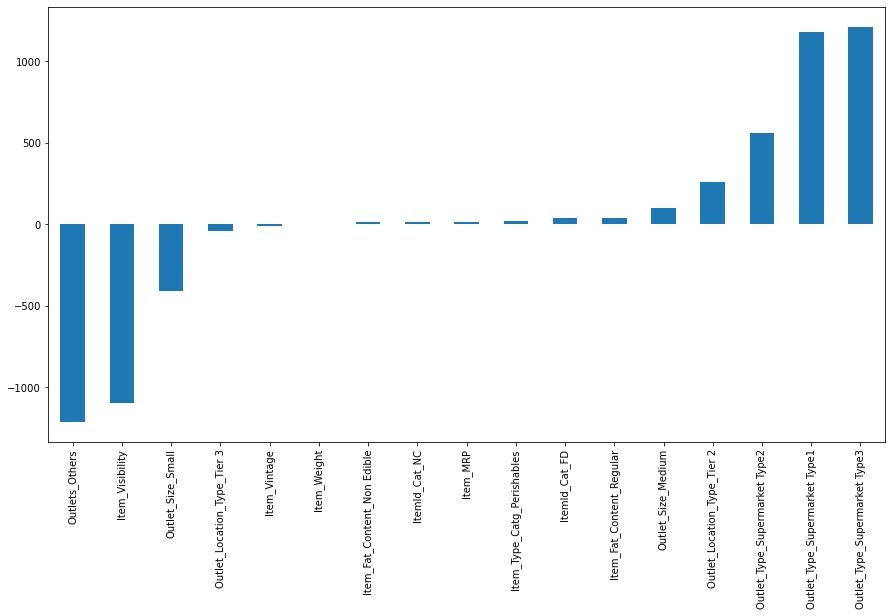

In [528]:
## Plot the Coefficients

pd.Series(ridge.coef_, xtrain.columns).sort_values().plot(kind="bar")
plt.show()

In [530]:
# Function that tells which predictors are 0s basis alpha values

def ridges(alphas):
    # Create a DataFrame
    df = pd.DataFrame()
    
    #Name of the Columns/Predictors
    df["Features"] = xtrain.columns
    
    # loop for all alphas
    for i in alphas:
        ridge = Ridge(alpha=i)
        ridge.fit(xtrain,ytrain)
        col_name = "Alpha = %f"%i
        df[col_name] = ridge.coef_
    return df

In [532]:
ridges([0.1, 0.01, 0.5, 1, 2, 5, 10])

,Features,Alpha = 0.100000,Alpha = 0.010000,Alpha = 0.500000,Alpha = 1.000000,Alpha = 2.000000,Alpha = 5.000000,Alpha = 10.000000
0,Item_Weight,-1.430617,-1.431235,-1.428221,-1.425899,-1.422898,-1.421166,-1.427773
1,Item_Visibility,-338.050971,-338.859500,-334.573176,-330.466536,-322.929662,-304.239470,-281.058334
2,Item_MRP,15.642717,15.642747,15.642611,15.642527,15.642473,15.642790,15.643852
3,Item_Vintage,-21.541542,-21.806820,-20.469940,-19.336640,-17.571710,-14.485820,-12.267543
4,Item_Fat_Content_Non Edible,11.475989,11.467443,11.510962,11.548813,11.609807,11.722944,11.800836
5,Item_Fat_Content_Regular,44.668188,44.666631,44.671865,44.670314,44.652680,44.540501,44.291251
6,Outlet_Size_Medium,-538.608547,-546.733030,-505.458291,-469.709131,-412.099600,-301.038923,-200.197764
7,Outlet_Size_Small,-620.573488,-627.205748,-593.820031,-565.606869,-521.905580,-446.880339,-396.267278
8,Outlet_Location_Type_Tier 2,-76.226618,-78.685569,-66.079745,-54.901831,-36.235283,3.189074,45.599992
9,Outlet_Location_Type_Tier 3,-310.885015,-315.230420,-293.171689,-274.105941,-243.485592,-185.044625,-133.285224


In [534]:
# Finding the RMSE and R2 Behavious basis different alphas.

rmse_train = []
rmse_test = []
r2 = []
al = []

alphas = [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]
for i in alphas:
    ridge = Ridge(alpha=i,normalize = True)
    al.append(i)
    pred_tr = ridge.fit(xtrain,ytrain).predict(xtrain)
    pred_te = ridge.fit(xtrain,ytrain).predict(xtest)
    rmse_train.append(np.sqrt(mean_squared_error(ytrain,pred_tr)))
    rmse_test.append(np.sqrt(mean_squared_error(ytest,pred_te)))
    r2.append(r2_score(ytest,pred_te))

In [536]:
ridge_df = pd.DataFrame({"alpha":al,"Rsq":r2,"RMSE_Train":rmse_train,"RMSE_Test":rmse_test})
ridge_df.sort_values(by="Rsq",ascending=False)

,alpha,Rsq,RMSE_Train,RMSE_Test
3,0.0005,0.580384,1142.894986,1067.943658
5,0.0010,0.580322,1142.903650,1068.022453
1,0.0100,0.579666,1143.369044,1068.857268
2,0.0200,0.578785,1144.388627,1069.976767
4,0.0900,0.568913,1156.942320,1082.442283
0,0.1000,0.567325,1158.988827,1084.433753
6,0.5000,0.499226,1242.497591,1166.656907
7,0.9900,0.423998,1326.221781,1251.222320
8,1.0000,0.422642,1327.670050,1252.693570
9,2.0000,0.317947,1434.506959,1361.542743


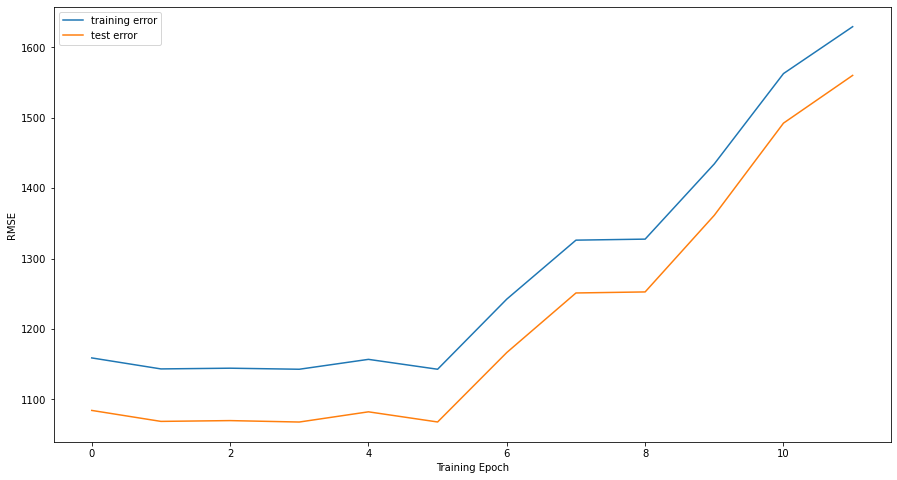

In [537]:
plt.plot(ridge_df["RMSE_Train"], label = "training error")
plt.plot(ridge_df["RMSE_Test"], label = "test error")
plt.xlabel("Training Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [539]:
#ridgecv

ridgecv = RidgeCV(cv=10, normalize=True)

pred_tr = ridgecv.fit(xtrain,ytrain).predict(xtrain)
pred_test = ridgecv.fit(xtrain,ytrain).predict(xtest)

print("train error: ",(np.sqrt(mean_squared_error(ytrain, pred_tr))))
print("test error: ",np.sqrt(mean_squared_error(ytest, pred_test)))

train error:  1158.9888273647202
test error:  1084.4337533672378


In [542]:
ridgecv.alpha_

0.1

### Elastic Net

In [554]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.0000001, normalize = True, max_iter = 10000)
pred_tr = enet.fit(xtrain, ytrain).predict(xtrain)
pred_te = enet.fit(xtrain,ytrain).predict(xtest)

print("train error:",np.sqrt(mean_squared_error(ytrain,pred_tr)))
print("test error:",np.sqrt(mean_squared_error(ytest, pred_te)))

train error: 1142.8931223533623
test error: 1067.9151438683205


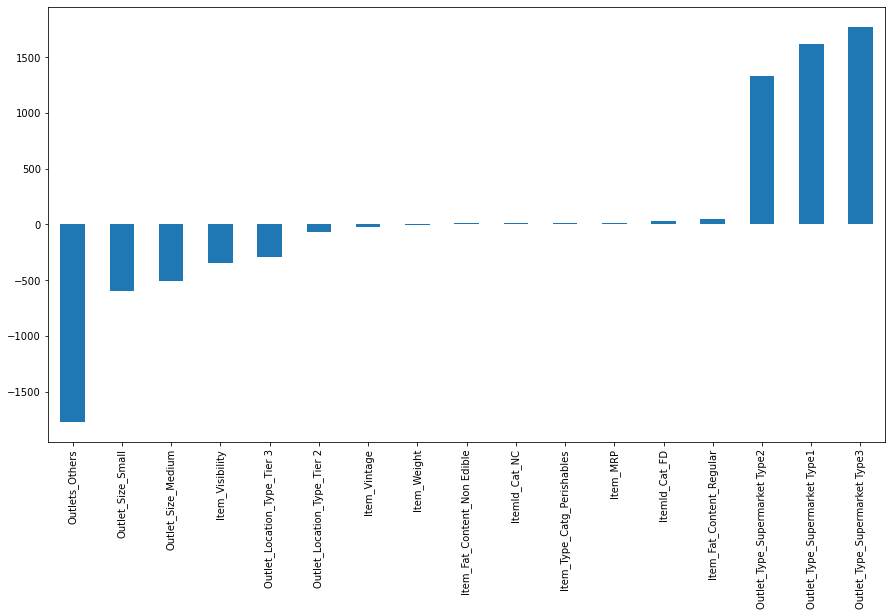

In [555]:
pd.Series(enet.coef_, xtrain.columns).sort_values().plot(kind = "bar")
plt.show()

In [556]:
# Enet = LRerror + Ridge penalty*lambda + Lasso Penalty*lambda

In [557]:
from sklearn.model_selection import GridSearchCV
alphas = [{'alpha':[0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5, 0.99, 1, 2, 5, 10]}]
grid =GridSearchCV(estimator = Ridge(normalize=True), param_grid= alphas, cv = 10)

grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=Ridge(normalize=True),
             param_grid=[{'alpha': [0.1, 0.01, 0.02, 0.0005, 0.09, 0.001, 0.5,
                                    0.99, 1, 2, 5, 10]}])

In [558]:
grid.best_params_

{'alpha': 0.001}